In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
data = pd.read_csv("creditcard.csv")
print (data.head())
print ("************************************************************************************************")
print (data.columns)
print ("************************************************************************************************")
print (data.describe())
print ("************************************************************************************************")
print (data.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

# Check for null data

In [16]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Check Datatype

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Data Visualization

In [29]:
plt.hist(figsize = (20, 20)) 
plt.show()

TypeError: hist() missing 1 required positional argument: 'x'

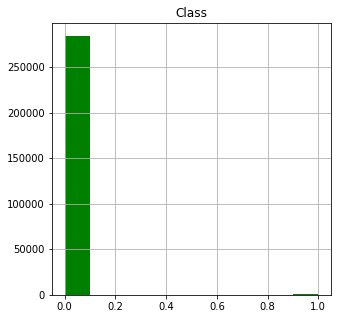

In [33]:
data.hist(column='Class', color='green',figsize = (5, 5)) 
plt.show()

In [37]:
Fraud = data[data['Class'] == 1]
print ('Fraud records: {}'.format(Fraud.shape))
Valid = data[data['Class'] == 0]
print ('Valid records: {}'.format(Valid.shape))

Fraud records: (492, 31)
Valid records: (284315, 31)


# outlier Fraction

In [38]:
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0017304750013189597


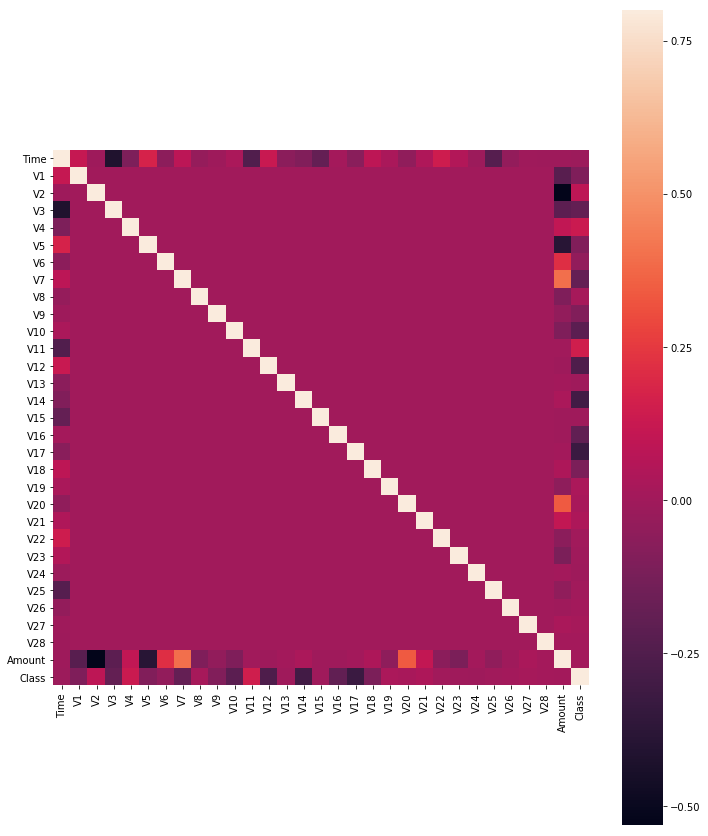

In [47]:
correlation = data.corr()
fig = plt.figure(figsize = (12, 15))

sb.heatmap(correlation, vmax=0.8, square = True)
plt.show()

In [53]:
x = data.drop("Class", axis =1)
y = data["Class"]
print (x.shape)
print (y.shape)

(284807, 30)
(284807,)


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(213605, 30) (71202, 30) (213605,) (71202,)


In [67]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

# Find Accuracy and Confusion Matrix

In [68]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 1.00
[[71063    31]
 [   31    77]]
